In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report, 
                            confusion_matrix, ConfusionMatrixDisplay)
import joblib
import json

In [3]:
# Load data
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\6th sem clg\SSP Project\Crop recomendation system\Data\Crop_recommendation.csv")
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


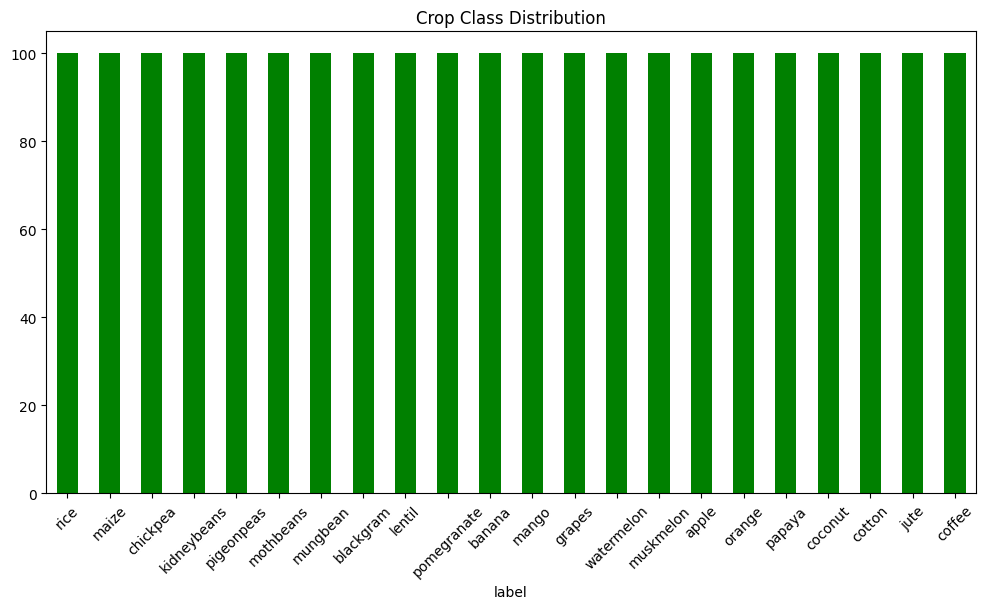

In [4]:
# EDA: Class Distribution
plt.figure(figsize=(12,6))
df['label'].value_counts().plot(kind='bar', color='green')
plt.title("Crop Class Distribution")
plt.xticks(rotation=45)
plt.show()

In [5]:
# Preprocessing
encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])
X = df.drop('label', axis=1)

In [8]:
# Save class names for frontend
class_names = encoder.classes_.tolist()
with open(r'C:\Users\HP\OneDrive\Desktop\6th sem clg\SSP Project\Crop recomendation system\models\classnames.json', 'w') as f:
    json.dump(class_names, f)

In [9]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Scaling (for consistency with other models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Model Training - Naive Bayes (Your Best Performer)
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Evaluation
y_pred = nb_model.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test, y_pred)

print("Naive Bayes Results:")
print(f"Accuracy: {nb_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Naive Bayes Results:
Accuracy: 0.9955

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       

<Figure size 1500x1000 with 0 Axes>

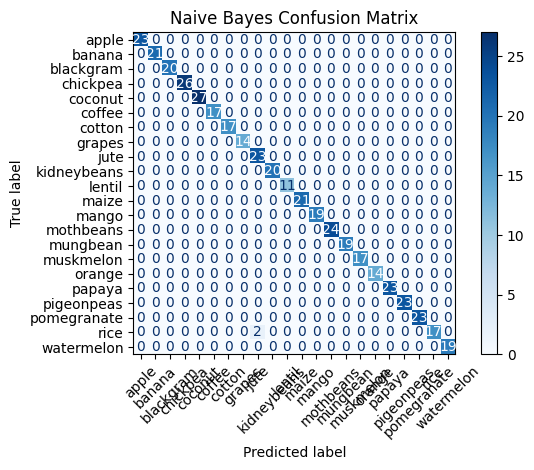

In [12]:
# Confusion Matrix
plt.figure(figsize=(15,10))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Naive Bayes Confusion Matrix")
plt.tight_layout()
plt.savefig(r"C:\Users\HP\OneDrive\Desktop\6th sem clg\SSP Project\Crop recomendation system\models/nb_confusion_matrix.png", dpi=300)
plt.show()

In [13]:
# Compare with Other Models (Optional)
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='rbf'),
    "Naive Bayes": GaussianNB()
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    
    if name == "Naive Bayes":  # Skip double-printing NB
        continue
        
    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.4f}")



Random Forest Results:
Accuracy: 0.9932

SVM Results:
Accuracy: 0.9682


In [14]:
# Show comparison
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
print("\nModel Comparison:")
print(results_df.sort_values('Accuracy', ascending=False))


Model Comparison:
           Model  Accuracy
2    Naive Bayes  0.995455
0  Random Forest  0.993182
1            SVM  0.968182


In [15]:
# Save Best Model (Naive Bayes)
joblib.dump(nb_model, r'C:\Users\HP\OneDrive\Desktop\6th sem clg\SSP Project\Crop recomendation system\models/crop_model_nav.pkl')
joblib.dump(scaler, r'C:\Users\HP\OneDrive\Desktop\6th sem clg\SSP Project\Crop recomendation system\models/scaler_nav.pkl')
joblib.dump(encoder, r'C:\Users\HP\OneDrive\Desktop\6th sem clg\SSP Project\Crop recomendation system\models/encoder_nav.pkl')

['C:\\Users\\HP\\OneDrive\\Desktop\\6th sem clg\\SSP Project\\Crop recomendation system\\models/encoder_nav.pkl']

In [16]:
print("\nSaved:")
print("- Naive Bayes model (crop_model.pkl)")
print("- Scaler (scaler.pkl)")
print("- Label Encoder (encoder.pkl)")
print("- Class names (class_names.json)")
print("- Confusion matrix plot (nb_confusion_matrix.png)")



Saved:
- Naive Bayes model (crop_model.pkl)
- Scaler (scaler.pkl)
- Label Encoder (encoder.pkl)
- Class names (class_names.json)
- Confusion matrix plot (nb_confusion_matrix.png)


In [19]:
# Sample Prediction Test
test_sample = np.array([[70, 30, 43, 20.9, 72, 6.5, 105.9]])  # Expected: Rice
test_scaled = scaler.transform(test_sample)
pred = nb_model.predict(test_scaled)
print(f"\nTest Prediction: {class_names[pred[0]]}")


Test Prediction: jute


c:\Users\HP\OneDrive\Desktop\6th sem clg\SSP Project\Crop recomendation system\crop_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
